In [31]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy.table import Table
import numpy as np
import sys
from matplotlib import cm
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from operator import itemgetter

Names = np.array(["theta","phi","closest_PMT","Start_Time","Arrival_Time","type","NEvent"])
datas = Table.read("Output.txt",format="ascii",names=Names)

thetas = np.array(datas["theta"])
phis = np.array(datas["phi"])
closest_PMTs = np.array(datas["closest_PMT"])
Start_Times = np.array(datas["Start_Time"])
Arrival_Times = np.array(datas["Arrival_Time"])
types = np.array(datas["type"])
NEvent = np.array(datas["NEvent"])

N = len(thetas)




[ 18.  69. 138. 181. 256. 283. 318. 333. 307. 323. 354. 331. 325. 332.
 300. 296. 293. 292. 284. 234. 268. 249. 248. 255. 232. 226. 238. 233.
 191. 192.]


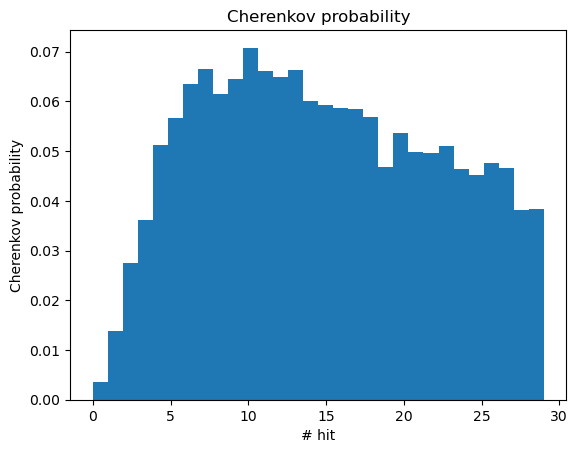

In [67]:
NEvents = 5000 # MUST UPDATE EACH TIME 

First_Hits = np.zeros(30)

iout = 0

for j in range(0,NEvents) :
    
    Sliced_Vector = []
    Ordered_Vector = []

    for i in range (iout,N) :
        if NEvent[i] == j :
            Sliced_Vector.append([Start_Times[i],types[i]])
        if NEvent[i] > j :
            iout = i
            break
        
    Ordered_Vector = sorted(Sliced_Vector, key=itemgetter(0), reverse=False)
    
    #print(Ordered_Vector)

    for k in range (0,min(30,len(Ordered_Vector))) :
        First_Hits[k] += Ordered_Vector[k][1]

print(First_Hits)


NBin = np.arange(0,30,1)

plt.hist(NBin,30,weights=First_Hits/NEvents)
plt.xlabel("# hit")
plt.ylabel("Cherenkov probability")
plt.title("Cherenkov probability")
plt.savefig("Nhits_prob")
plt.show()


